# Spam Email Classifier

# Problem statement :Segragate the input emails into spam and not spam

Steps:

1. create the dataset.
2. Visialization
3. Build the model
4. Train the model
5. Make predictions.

In [20]:
#Importing All The Python libraries Which Are Going To Be Used In This Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import pickle

loading the SPAM dataset to a pandas DataFrame

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [21]:
#Printing the total numbers of rows and columns in this dataset
df.shape

(5572, 3)

In [23]:
#Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
Category    5572 non-null object
Message     5572 non-null object
spam        5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [6]:
#Getting Statistical measures of the given dataset
df.describe()

,spam
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
df.isnull().sum()

Category    0
Message     0
spam        0
dtype: int64

# Data visualization

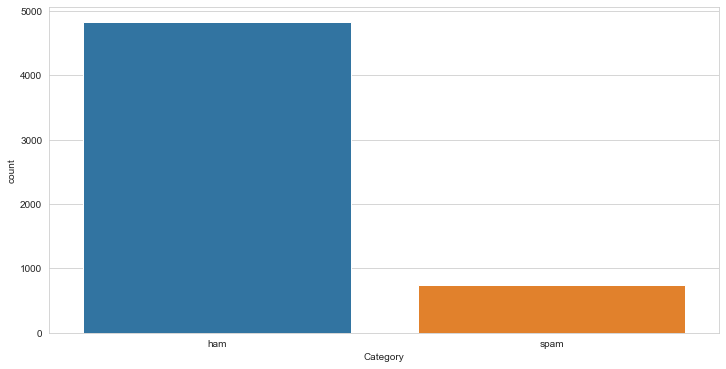

In [29]:
sns.set_style('whitegrid')
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'Category');

Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.2)

In [10]:
v=CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Training Model

In [11]:
model= MultinomialNB()
y_predicted = model.fit(X_train_count,y_train)
y_predicted

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
emails=[
       "Your free ringtone is waiting to be collected. Simply text the password ""MIX"" to 85069 to verify. Get Usher and Britney. FML, PO Box 5249, MK17 92H. 450Ppw 16",
       "Watching telugu movie..wat abt u?"
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([1, 0], dtype=int64)

In [13]:
X_test_count=v.transform(X_test)
model.score(X_test_count,y_test)

0.9829596412556054

In [14]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [15]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [16]:
clf.predict(emails)

array([1, 0], dtype=int64)

In [17]:
rfc=RandomForestClassifier()
rfc.fit(X_train_count,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
rfc.score(X_test_count,y_test)

0.968609865470852

In [19]:
with open("rfc_model.pkl",'wb') as file:
    pickle.dump(rfc,file)